In [47]:
import numpy as np
import matplotlib.pyplot as plt

folder_path = '/Users/md/Library/CloudStorage/OneDrive-Personal/Mohit/RIT/trading/codebases/stockPredict/time_series_benchmarking/crossformer/OriginalPaperCode/results/'

# setting_name = 'Crossformer_ETTh1_il168_ol1_sl6_win2_fa10_dm256_nh4_el3_itr0'
setting_name = 'Crossformer_stock_AKAM_il168_ol1_sl6_win2_fa10_dm256_nh4_el3_itr0'

# Read data from pred.npy and true.npy
preds = np.load(folder_path + setting_name + '/pred.npy', allow_pickle=True)
trues = np.load(folder_path + setting_name + '/true.npy', allow_pickle=True)

# Check if the data is saved in a list
if type(preds) is np.ndarray:
    preds = [preds]
    trues = [trues]

In [48]:
trues

[array([[[ 8.1417173e-02,  1.8079874e-04,  9.4221013e-11,  4.6059992e-03,
           7.2377939e+00,  6.5510035e-03]],
 
        [[ 4.2863497e-01,  3.6948087e-04, -2.1948088e-10, -1.2447001e-02,
           1.0340166e+01, -2.1334006e-02]],
 
        [[-4.4657522e-01,  1.8423019e-04,  5.1372642e-11,  1.1470011e-03,
           5.7225037e+00,  2.7709927e-03]],
 
        ...,
 
        [[-7.3919415e-01,  9.3711868e-05, -6.6963809e-11, -2.2269983e-03,
           4.5670481e+00, -5.3129895e-03]],
 
        [[ 1.8182594e+00,  3.8222698e-04, -8.8046535e-11,  1.3419975e-03,
           1.2871125e+01, -1.9304998e-02]],
 
        [[-6.1208576e-01,  9.5247146e-04,  3.8064607e-11,  6.4389990e-03,
           4.9954705e+00,  3.2490045e-03]]], dtype=float32)]

Predictions shape: (1065, 1)
True values shape: (1065, 1)
Selected setting: Crossformer_stock_AKAM_il168_ol1_sl6_win2_fa10_dm256_nh4_el3_itr0


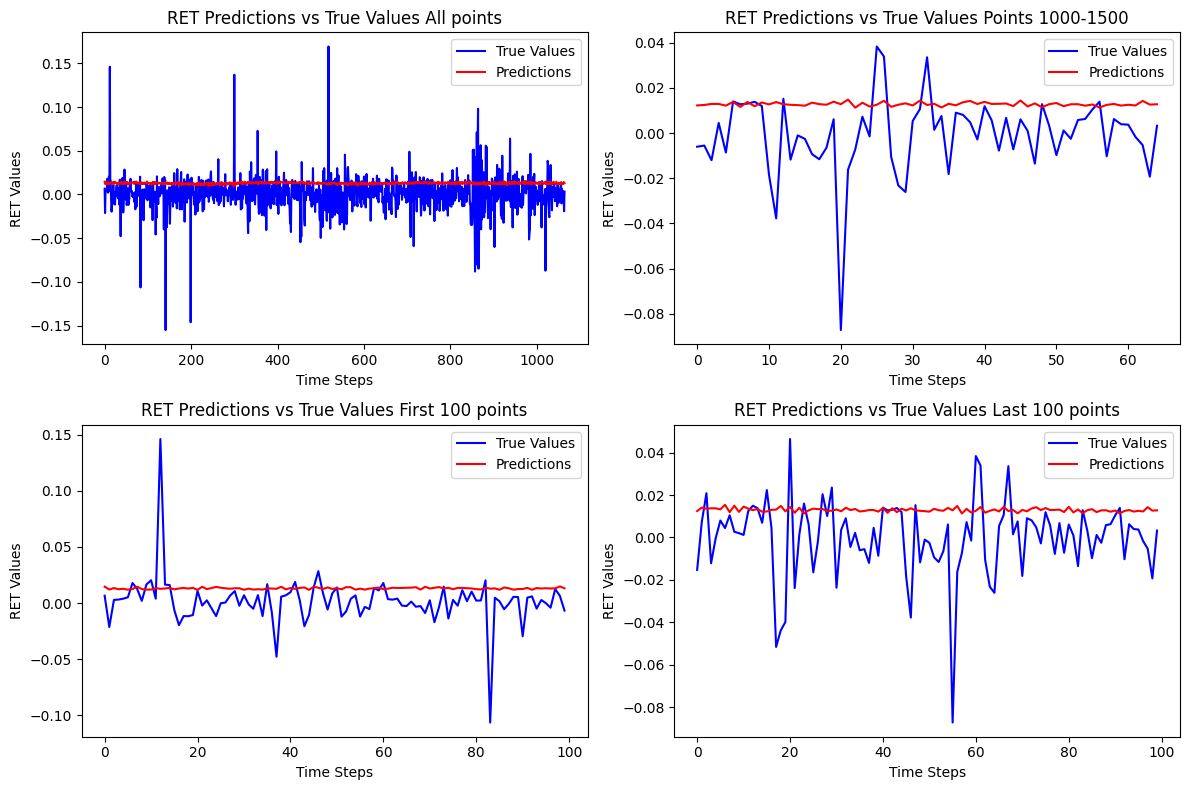

In [49]:
# Assuming RET is the first variable, index 0
ret_preds = [pred[:, :, 5] for pred in preds]  # Adjust indexing based on data shape
ret_trues = [true[:, :, 5] for true in trues]  # Adjust indexing based on data shape

ret_preds = np.concatenate(ret_preds, axis=0)
ret_trues = np.concatenate(ret_trues, axis=0)

print("Predictions shape:", ret_preds.shape)
print("True values shape:", ret_trues.shape)

print(f"Selected setting: {setting_name}")

# plot settings

plot_settings = { "plot_title": "RET Predictions vs True Values",
                    "x_label": "Time Steps",
                    "y_label": "RET Values",
                    "legend": ["True Values", "Predictions"],
                    "colors": ["blue", "red"],
                    "figsize": (8, 6),
                    "different_plots":{"All points":{'a':0,'b':ret_preds.shape[0]},
                                       "Points 1000-1500":{'a':1000,'b':1500},
                                       "First 100 points":{'a':0,'b':100},
                                       "Last 100 points":{'a':ret_preds.shape[0] -100,'b':ret_preds.shape[0]}
                                       }
                }

# Plotting

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, key in enumerate(plot_settings["different_plots"]):
    a = plot_settings["different_plots"][key]['a']
    b = plot_settings["different_plots"][key]['b']
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.plot(ret_trues.flatten()[a:b], label=plot_settings["legend"][0], color=plot_settings["colors"][0])
    ax.plot(ret_preds.flatten()[a:b], label=plot_settings["legend"][1], color=plot_settings["colors"][1])
    ax.set_title(plot_settings["plot_title"] + " " + key)
    ax.set_xlabel(plot_settings["x_label"])
    ax.set_ylabel(plot_settings["y_label"])
    ax.legend()

plt.tight_layout()
plt.show()

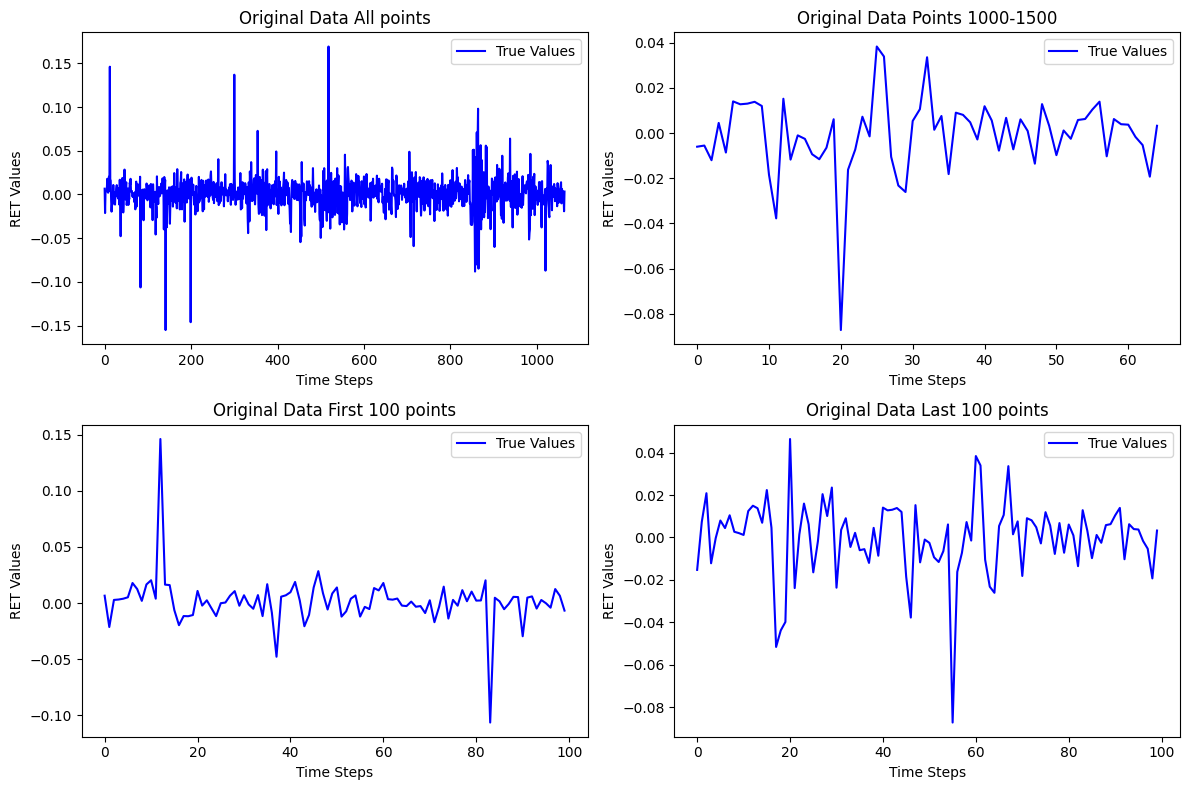

In [53]:
# Plot original data

import pandas as pd

# Define the original data file path
original_file = '/Users/md/Library/CloudStorage/OneDrive-Personal/Mohit/RIT/trading/codebases/stockPredict/time_series_benchmarking/crossformer/OriginalPaperCode/datasets/my_data/AKAM_filtered_data.csv'


# Read the data from the input file
data = pd.read_csv(original_file)

# filter data to only include the last 1650 points
test_data = data.tail(1065)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

test_data_settings = {
                        "different_plots":{"All points":{'a':0,'b':ret_preds.shape[0]},
                                       "Points 1000-1500":{'a':1000,'b':1500},
                                       "First 100 points":{'a':0,'b':100},
                                       "Last 100 points":{'a':ret_preds.shape[0] -100,'b':ret_preds.shape[0]}
                                       }
}

for i, key in enumerate(test_data_settings["different_plots"]):
    a = test_data_settings["different_plots"][key]['a']
    b = test_data_settings["different_plots"][key]['b']
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.plot(test_data['RET'].values[a:b], label=plot_settings["legend"][0], color=plot_settings["colors"][0])
    ax.set_title("Original Data " + key)
    ax.set_xlabel(plot_settings["x_label"])
    ax.set_ylabel(plot_settings["y_label"])
    ax.legend()

plt.tight_layout()
plt.show()




In [39]:
data

,date,VOL_CHANGE,BA_SPREAD,ILLIQUIDITY,sprtrn,TURNOVER,RET
0,1999-11-01,-0.554523,0.000717,2.221163e-10,-0.006464,56.660812,0.200603
1,1999-11-02,-0.222338,0.000649,1.361950e-10,-0.004712,44.062958,0.105773
2,1999-11-03,-0.611596,0.000655,-3.256651e-11,0.005335,17.114236,-0.009728
3,1999-11-04,0.029249,0.000361,-3.308900e-10,0.005690,17.614805,-0.092338
4,1999-11-05,-0.515847,0.000000,4.247632e-11,0.005570,8.528269,0.005772
...,...,...,...,...,...,...,...
5322,2020-12-24,-0.609290,0.000372,8.497128e-11,0.003537,2.513330,0.003736
5323,2020-12-28,5.967369,0.000839,-5.476957e-12,0.008723,17.511296,-0.001675
5324,2020-12-29,-0.739194,0.000094,-6.696698e-11,-0.002227,4.567048,-0.005313
5325,2020-12-30,1.818259,0.000382,-8.803911e-11,0.001342,12.871125,-0.019305


In [ ]:
# BACKUP CODE

# Assuming RET is the first variable, index 0
ret_preds = [pred[:, :, 0] for pred in preds]  # Adjust indexing based on data shape
ret_trues = [true[:, :, 0] for true in trues]  # Adjust indexing based on data shape

ret_preds = np.concatenate(ret_preds, axis=0)
ret_trues = np.concatenate(ret_trues, axis=0)

print("Predictions shape:", ret_preds.shape)
print("True values shape:", ret_trues.shape)


# plot settings

plot_settings = { "plot_title": "RET Predictions vs True Values",
                    "x_label": "Time Steps",
                    "y_label": "RET Values",
                    "legend": ["True Values", "Predictions"],
                    "colors": ["blue", "red"],
                    "figsize": (8, 6),
                    "different_plots":{"All points":{'a':0,'b':ret_preds.shape[0]},
                                       "First 100 points":{'a':0,'b':100},
                                       "Last 100 points":{'a':ret_preds.shape[0] -100,'b':ret_preds.shape[0]}
                                       }
                }


# Plotting

for key in plot_settings["different_plots"]:
    a = plot_settings["different_plots"][key]['a']
    b = plot_settings["different_plots"][key]['b']

    plt.figure(figsize=plot_settings["figsize"])
    plt.plot(ret_trues.flatten()[a:b], label=plot_settings["legend"][0], color=plot_settings["colors"][0])  # Flatten if data has more than 1 dimension per timestep
    plt.plot(ret_preds.flatten()[a:b], label=plot_settings["legend"][1], color=plot_settings["colors"][1])
    plt.title(plot_settings["plot_title"] + " " + key)
    plt.xlabel(plot_settings["x_label"])
    plt.ylabel(plot_settings["y_label"])
    plt.legend()
    plt.show()



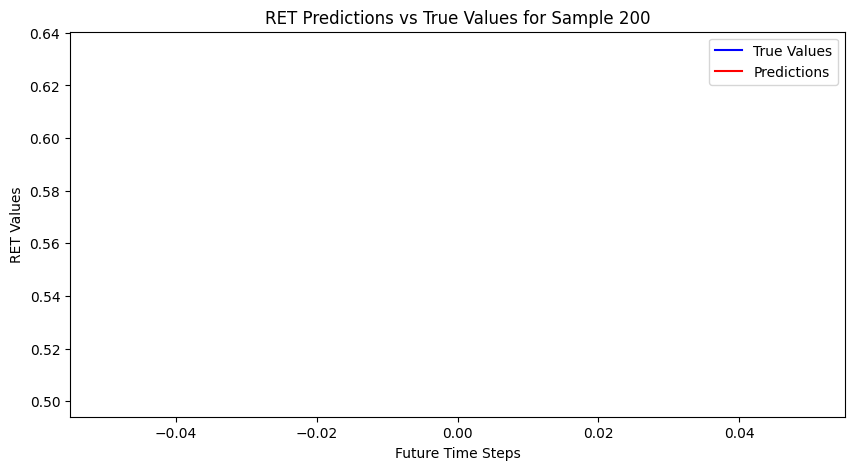

In [7]:
import matplotlib.pyplot as plt

# Choose a sample index, e.g., 0 for the first sample
sample_index = 200

plt.figure(figsize=(10, 5))
plt.plot(ret_trues[sample_index], label='True Values', color='blue')
plt.plot(ret_preds[sample_index], label='Predictions', color='red')
plt.title(f'RET Predictions vs True Values for Sample {sample_index}')
plt.xlabel('Future Time Steps')
plt.ylabel('RET Values')
plt.legend()
plt.show()


In [2]:
# plot the data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

NameError: name 'mdates' is not defined

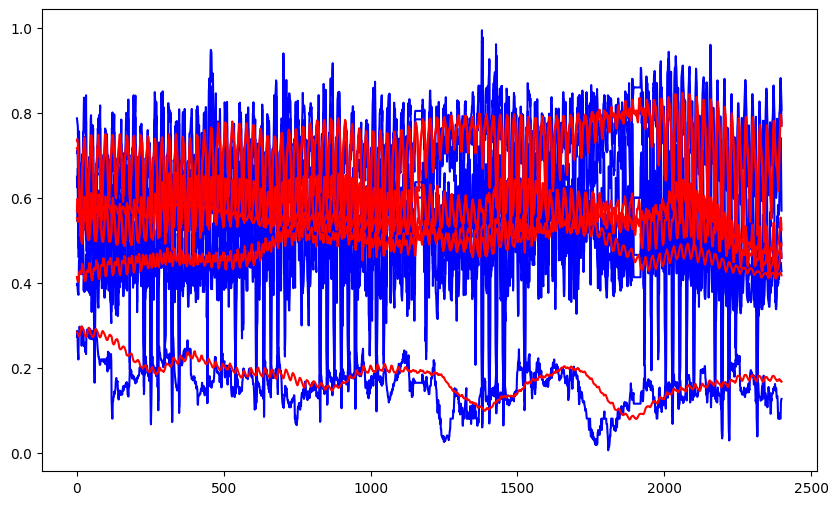

In [11]:

save_pred = False

for i in range(len(preds)):
    pred = preds[i]
    true = trues[i]
    
    

    pred = pred.mean(axis=1)
    true = true.mean(axis=1)

    # plot only the last 24 hours
    pred = pred[-2400:]
    true = true[-2400:]


    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(true, label='True', color='blue')
    ax.plot(pred, label='Predicted', color='red')
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.xticks(rotation=45)
    plt.title('Crossformer')
    plt.legend()
    plt.show()
    if save_pred:
        fig.savefig(folder_path + f'plot_{i}.png')
    

1

In [6]:
preds

array([[[[ 0.3391638 ,  0.3782977 ,  0.5358027 , ..., -0.06883225,
           0.43475145, -1.0117142 ],
         [ 0.3370298 ,  0.4766886 ,  0.5483122 , ..., -0.07379773,
           0.49365142, -1.0423534 ],
         [ 0.2910675 ,  0.48586243,  0.5077372 , ..., -0.19825625,
           0.5456114 , -0.940686  ],
         ...,
         [-0.04859549, -0.628492  , -0.04213908, ...,  0.21184486,
           0.6443997 , -0.95409495],
         [ 0.06929362, -0.16014302,  0.21580738, ...,  0.03428665,
           0.62752277, -0.982129  ],
         [ 0.37592927,  0.46113515,  0.5222129 , ...,  0.11320424,
           0.5711163 , -0.97335446]],

        [[ 0.31642276,  0.62612075,  0.49476117, ..., -0.2469944 ,
           0.40666884, -0.9992341 ],
         [ 0.23095216,  0.59349716,  0.45703983, ..., -0.34879866,
           0.420811  , -1.0230366 ],
         [ 0.30131927,  0.53283525,  0.47825843, ..., -0.5166725 ,
           0.42342427, -0.9396267 ],
         ...,
         [ 0.08560276, -0.11671533